# A rigorous, thorough, and high quality determination of phase transition existence and critical temperature in the 2D Ising Model

Determine the phase transition exists:
1. Mag vs. Temp
2. Sus. vs. Temp
3. Heat cap vs. Temp
4. Autocorrelation vs. Temp

Determine that the data we are taking is independent:
1. Autocorrelation as a func of lag time
2. Mag/sus/heat time series data
3. ?

Calculate critical temperature:
1. Binder cumulant
2. Finite scaling techniques??????
3. autocor?????

Do these things for various lattice sizes (can I extrapolate to infinite lattice size?). Also think about error bars/uncertainty for each method and lattice size

### Imports

In [275]:
#imports 
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize
import json
import copy
from scipy.optimize import curve_fit
import math
from scipy import fft

### Lattice Algorithms

In [276]:
def initLattice(latticeSize: int, hot: bool) -> list[list[int]]:
    lattice = np.zeros((latticeSize, latticeSize))
    if hot:
        for i in range(latticeSize):
            for j in range(latticeSize):
                #pick a random spin
                spin = 0
                randomInt = random.randint(0,1)
                if(randomInt == 1):
                    spin = 1
                else:
                    spin = -1
                #set lattice site equal to the random spin    
                lattice[i][j] = spin
    else: #lattice is cold
        for i in range(latticeSize):
            for j in range(latticeSize):
                #set all lattice sites to spin up
                spin = 1
                lattice[i][j] = spin
    
    return lattice

In [277]:
# Calculate change in energy of lattice by flipping a single site (i,j)
def deltaU(i: int, j: int, lattice: list) -> float:
    '''
    This calulation requires considering neighboring sites (first term in Hamiltonian)
    Therefore, we will use periodic boundary conditions (torus)
    I would like to imlement the external field term so you can drive the system to specific states

    E1 = -spin(i,j)*sum(spin(neighbors)),     E2 = spin(i,j)*sum(spin(neighbors))
    Ediff = E2 - E1 = 2spin(i,j)*sum(neighbors) (if spin(i,j) is 1 (up))            <<<<< NO epsilon/J? unclear why, currently just implementing pseudocode exactly as written

    In the mean field approximation E_up = -4J*sum(spin(neighbors))/4) 

    i is vertical, j is horizontal, zero indexed
    '''

    size = len(lattice)
    # If site is in an edge, apply periodic boundary conditions
    if(i == 0):
        top = lattice[size-1,j]
    else:
        top = lattice[i-1][j]
    if(i == size-1):
        bottom = lattice[0][j]
    else:
        bottom = lattice[i+1][j]
    if(j == 0):
        left = lattice[i][size-1]
    else:
        left = lattice[i][j-1]
    if(j == size-1):
        right = lattice[i][0]
    else:
        right = lattice[i][j+1]

    #now calculate the energy difference
    Ediff = 2*lattice[i][j]*(top+bottom+left+right)
    return Ediff

In [278]:
def Metropolis(lattice, temp, iterations):
    m = []
    for iteration in range(iterations):

        if((iteration % 99 == 0) and (iteration != 0)):
            sum = 0
            for xSite in range(lattice[0].size):
                for ySite in range(lattice[0].size):
                    sum += lattice[xSite][ySite]
            m.append(abs(sum)) 

        i = random.randint(0,lattice[0].size-1)
        j = random.randint(0,lattice[0].size-1)
        Ediff = deltaU(i,j,lattice)
        #Metropolis to decide whether site should be flipped.
        if(Ediff <= 0):
            lattice[i][j] = -lattice[i][j] 
        else:
            #now only flip site according to Boltzmann factor
            boltzmannRandom = random.uniform(0,1)
            if(boltzmannRandom < np.exp(-Ediff/temp)): #Ediff must be positive so exponential is between 0 and 1
                lattice[i][j] = -lattice[i][j]

    return m

In [279]:
def MetropolisNew(lattice, temp):
    '''
    Only peform 1 Metropolis update, taking no measurements
    '''
    i = random.randint(0,len(lattice[0])-1)
    j = random.randint(0,len(lattice[0])-1)
    Ediff = deltaU(i,j,lattice)
    #Metropolis to decide whether site should be flipped.
    if(Ediff <= 0):
        lattice[i][j] = -lattice[i][j] 
    else:
        #now only flip site according to Boltzmann factor
        boltzmannRandom = random.uniform(0,1)
        if(boltzmannRandom < np.exp(-Ediff/temp)): #Ediff must be positive so exponential is between 0 and 1
            lattice[i][j] = -lattice[i][j]


**avg mag should be changed to just calculate avg mag without temp and iterations and the iterate over avg mag and temps**

In [280]:
def calcMagArr(lattice, temp, iterations):
    mArr = []
    for iteration in range(iterations):
        MetropolisNew(lattice,temp)
        if((iteration % 99 == 0) and (iteration != 0)):
            sum = 0
            for xSite in range(lattice[0].size):
                for ySite in range(lattice[0].size):
                    sum += lattice[xSite][ySite]
            mArr.append(abs(sum)) 
    
    return mArr

previous run at n=12 was 2 min 4 sec, n=24 = 2.5, 48=4.7, 64=6min58

### Observable plots
Things mentioned in the first sections go here.

0.0%
0.3%
0.5%
0.8%
1.0%
1.3%
1.5%
1.8%
2.0%
2.3%
2.5%
2.8%
3.0%
3.3%
3.5%
3.8%
4.0%
4.3%
4.5%
4.8%
5.0%
5.3%
5.5%
5.8%
6.0%
6.3%
6.5%
6.8%
7.0%
7.3%
7.5%
7.8%
8.0%
8.3%
8.5%
8.8%
9.0%
9.3%
9.5%
9.8%
10.0%
10.3%
10.5%
10.8%
11.0%
11.3%
11.5%
11.8%
12.0%
12.3%
12.5%
12.8%
13.0%
13.3%
13.5%
13.8%
14.0%
14.3%
14.5%
14.8%
15.0%
15.3%
15.5%
15.8%
16.0%
16.3%
16.5%
16.8%
17.0%
17.3%
17.5%
17.8%
18.0%
18.3%
18.5%
18.8%
19.0%
19.3%
19.5%
19.8%
20.1%
20.3%
20.6%
20.8%
21.1%
21.3%
21.6%
21.8%
22.1%
22.3%
22.6%
22.8%
23.1%
23.3%
23.6%
23.8%
24.1%
24.3%
24.6%
24.8%
25.1%
25.3%
25.6%
25.8%
26.1%
26.3%
26.6%
26.8%
27.1%
27.3%
27.6%
27.8%
28.1%
28.3%
28.6%
28.8%
29.1%
29.3%
29.6%
29.8%
30.1%
30.3%
30.6%
30.8%
31.1%
31.3%
31.6%
31.8%
32.1%
32.3%
32.6%
32.8%
33.1%
33.3%
33.6%
33.8%
34.1%
34.3%
34.6%
34.8%
35.1%
35.3%
35.6%
35.8%
36.1%
36.3%
36.6%
36.8%
37.1%
37.3%
37.6%
37.8%
38.1%
38.3%
38.6%
38.8%
39.1%
39.3%
39.6%
39.8%
40.1%
40.4%
40.6%
40.9%
41.1%
41.4%
41.6%
41.9%
42.1%
42.4%
42.6%
42.9%
43.1%
43

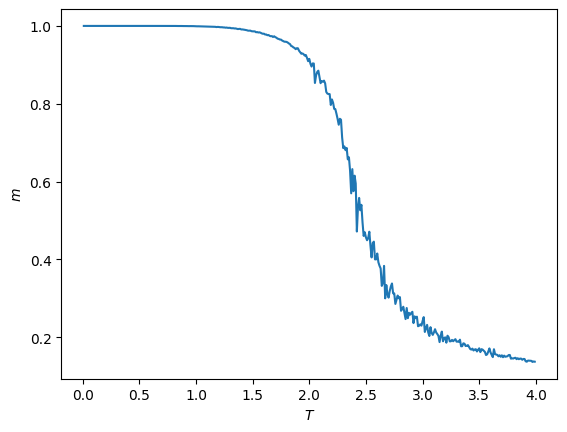

In [628]:
size = 12 #6,12,16,24,32
lattice = initLattice(size, True)

tempRange = np.flip(np.arange(0.01,4,0.01))
avgArr32 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%" % percent)
    mAvg = 1/(np.power(size,2))*np.average(calcMagArr(lattice, temp, 500000))
    avgArr32.append(mAvg)

avgArr32

plt.xlabel("$T$")
plt.ylabel("$m$")
plt.plot(tempRange, avgArr32)

The idea is to extrapolate the pesudocrti temps from sus peaks. Collapse binder cumulant data?

Need to find v from best binder cumulant collapse. ALSOM MANUALLY CHECK BY CREATING A CORRELATION FUNCTION PLOT??

In [23]:
# with open('avgArr32.txt', 'w') as filehandle:
#     json.dump(avgArr32, filehandle)

In [462]:
#Binder cumulant function
def binderCum(lattice, temp, iterations):
    m2Arr = []
    m4Arr = []
    cumArr = []
    #sum4 = 0
    for iteration in range(iterations):
        magArr = calcMagArr(lattice, temp, 500000) #already doing 10k iterations on the mag . . . and 10 on the BC call in plotting
        m2Arr = [np.power(x,2) for x in magArr]
        m4Arr = [np.power(x,4) for x in magArr]
        
        avgm2 = np.average(m2Arr)
        avgm4 = np.average(m4Arr)

        cumulant = 1 - (avgm4)/(3*np.power(avgm2,2))
        cumArr.append(cumulant)

    
    return np.average(cumArr) #IS IT CORRECT TO AVERAGE THE BINDER CUM??


In [302]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

0.0%    L=6
0.3%    L=6
0.6%    L=6
0.9%    L=6
1.1%    L=6
1.4%    L=6
1.7%    L=6
2.0%    L=6
2.3%    L=6
2.6%    L=6
2.9%    L=6
3.2%    L=6
3.4%    L=6
3.7%    L=6
4.0%    L=6
4.3%    L=6
4.6%    L=6
4.9%    L=6
5.2%    L=6
5.4%    L=6
5.7%    L=6
6.0%    L=6
6.3%    L=6
6.6%    L=6
6.9%    L=6
7.2%    L=6
7.4%    L=6
7.7%    L=6
8.0%    L=6
8.3%    L=6
8.6%    L=6
8.9%    L=6
9.2%    L=6
9.5%    L=6
9.7%    L=6
10.0%    L=6
10.3%    L=6
10.6%    L=6
10.9%    L=6
11.2%    L=6
11.5%    L=6
11.7%    L=6
12.0%    L=6
12.3%    L=6
12.6%    L=6
12.9%    L=6
13.2%    L=6
13.5%    L=6
13.8%    L=6
14.0%    L=6
14.3%    L=6
14.6%    L=6
14.9%    L=6
15.2%    L=6
15.5%    L=6
15.8%    L=6
16.0%    L=6
16.3%    L=6
16.6%    L=6
16.9%    L=6
17.2%    L=6
17.5%    L=6
17.8%    L=6
18.1%    L=6
18.3%    L=6
18.6%    L=6
18.9%    L=6
19.2%    L=6
19.5%    L=6
19.8%    L=6
20.1%    L=6
20.3%    L=6
20.6%    L=6
20.9%    L=6
21.2%    L=6
21.5%    L=6
21.8%    L=6
22.1%    L=6
22.3%    L=6
22.6%   

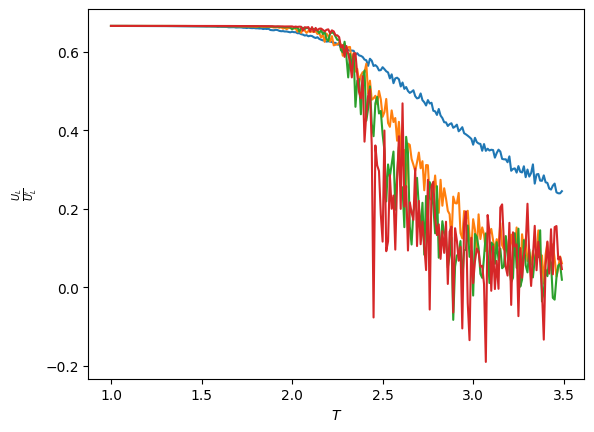

In [488]:
#Magnetization vs temperature

#L=6
lattice = initLattice(6, True)

tempRange = np.flip(np.arange(1,3.5,0.01))
avgArr6 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%    L=6" % percent)
    cumAvg = binderCum(lattice, temp, 1)
    avgArr6.append(cumAvg)


#L=12
lattice = initLattice(12, True)

#tempRange = np.flip(np.arange(2,2.5,0.01))
avgArr12 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%    L=12" % percent)
    cumAvg = binderCum(lattice, temp, 1)
    avgArr12.append(cumAvg)

#L=16
lattice = initLattice(16, True)

#tempRange = np.flip(np.arange(2,2.5,0.01))
avgArr16 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%    L=16" % percent)
    cumAvg = binderCum(lattice, temp, 1)
    avgArr16.append(cumAvg)

#L=24
lattice = initLattice(24, True)

#tempRange = np.flip(np.arange(2,2.5,0.01))
avgArr24 = []
for temp in tempRange:
    percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
    print("%s%%    L=24" % percent)
    cumAvg = binderCum(lattice, temp, 1)
    avgArr24.append(cumAvg)

plt.xlabel("$T$")
plt.ylabel("$\\frac{U_L}{U_L'}$")
plt.plot(tempRange, avgArr6)
plt.plot(tempRange, avgArr12)
plt.plot(tempRange, avgArr16)
plt.plot(tempRange, avgArr24)

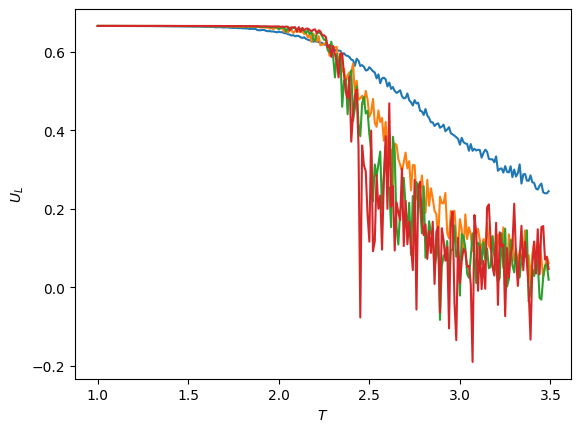

In [564]:
plt.xlabel("$T$")
plt.ylabel("$U_L$")
plt.plot(tempRange, avgArr6)
plt.plot(tempRange, avgArr12)
plt.plot(tempRange, avgArr16)
plt.plot(tempRange, avgArr24)

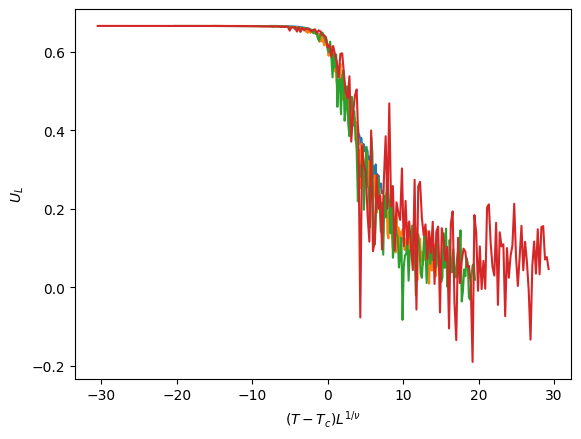

In [630]:
##FSS BIDER CUMULANT STUFF
plt.xlabel("$(T-T_c)L^{1/\\nu}$")
plt.ylabel("$U_L$")

tempRange = np.flip(np.arange(1,3.5,0.01))

Tc = 2.27  #2.239682835820894
nu = 1
tilde = 1
xTemp6 = [(temp-Tc)*np.power(6,(1)/(nu)) for temp in tempRange]
xTemp12 = [(temp-Tc)*np.power(12,(1)/(nu)) for temp in tempRange]
xTemp16 = [(temp-Tc)*np.power(16,(1)/(nu)) for temp in tempRange]
xTemp24 = [(temp-Tc)*np.power(24,(1)/(nu)) for temp in tempRange]
# print([round(temp,1) for temp in xTemp])
# print([round(temp,1) for temp in tempRange])


w = 1
plt.plot(xTemp6, tilde*movingaverage(avgArr6,w))
plt.plot(xTemp12, tilde*movingaverage(avgArr12,w))
plt.plot(xTemp16, tilde*movingaverage(avgArr16,w))
plt.plot(xTemp24, tilde*movingaverage(avgArr24,w))
#plt.xlim(-7,6)

In [604]:
from numpy import loadtxt
bc6 = loadtxt("BinderCumulant6.txt", comments="#", delimiter=",", unpack=False)
bc12 = loadtxt("BinderCumulant12.txt", comments="#", delimiter=",", unpack=False)
bc16 = loadtxt("BinderCumulant16.txt", comments="#", delimiter=",", unpack=False)
bc24 = loadtxt("BinderCumulant24.txt", comments="#", delimiter=",", unpack=False)
bc6Arr = list(bc6)
bc12Arr = list(bc12)
bc16Arr = list(bc16)
bc24Arr = list(bc24)


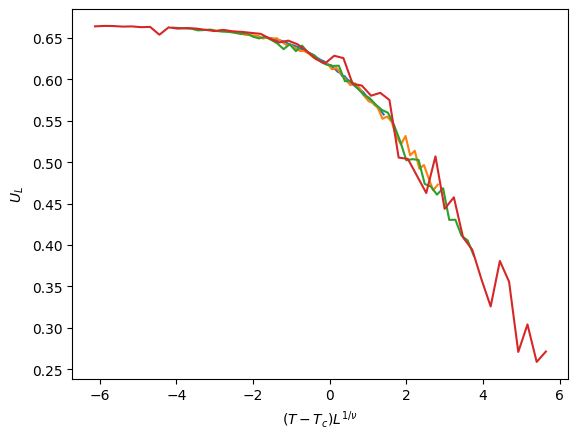

In [627]:
##FSS BIDER CUMULANT STUFF
plt.xlabel("$(T-T_c)L^{1/\\nu}$")
plt.ylabel("$U_L$")

tempRange = np.flip(np.arange(2,2.5,0.01))

Tc = 2.255  #2.239682835820894
nu = 1
tilde = 1
xTemp6 = [(temp-Tc)*np.power(6,(1)/(nu)) for temp in tempRange]
xTemp12 = [(temp-Tc)*np.power(12,(1)/(nu)) for temp in tempRange]
xTemp16 = [(temp-Tc)*np.power(16,(1)/(nu)) for temp in tempRange]
xTemp24 = [(temp-Tc)*np.power(24,(1)/(nu)) for temp in tempRange]
# print([round(temp,1) for temp in xTemp])
# print([round(temp,1) for temp in tempRange])


w = 1
plt.plot(xTemp6, tilde*movingaverage(bc6Arr,w))
plt.plot(xTemp12, tilde*movingaverage(bc12Arr,w))
plt.plot(xTemp16, tilde*movingaverage(bc16Arr,w))
plt.plot(xTemp24, tilde*movingaverage(bc24Arr,w))
#plt.xlim(-7,6)

In [623]:
tempRange = np.flip(np.arange(2,2.5,0.01))
BC6f = interpolate.interp1d(tempRange, bc6Arr)
BC12f = interpolate.interp1d(tempRange, bc12Arr)
BC16f = interpolate.interp1d(tempRange, bc16Arr)
BC24f = interpolate.interp1d(tempRange, bc24Arr)
def diff1(temp):
    return BC6f(temp) - BC12f(temp)
def diff2(temp):
    return BC6f(temp) - BC16f(temp)
def diff3(temp):
    return BC6f(temp) - BC24f(temp)
def diff4(temp):
    return BC12f(temp) - BC16f(temp)
def diff5(temp):
    return BC12f(temp) - BC24f(temp)
def diff6(temp):
    return BC16f(temp) - BC24f(temp)
#plt.plot(tempRange, [diff1(x) for x in tempRange])
susPeaksArr = []
susPeaksArr.append(optimize.brentq(diff1,2.1,2.45))
susPeaksArr.append(optimize.brentq(diff2,2.1,2.45))
susPeaksArr.append(optimize.brentq(diff3,2.1,2.45))
susPeaksArr.append(optimize.brentq(diff4,2.1,2.45))
susPeaksArr.append(optimize.brentq(diff5,2.1,2.45))
susPeaksArr.append(optimize.brentq(diff6,2.1,2.45))
print(2*np.std(susPeaksArr))
np.average(susPeaksArr)

0.053640430967165094


2.2548666427803137

Text(0, 0.5, '$U_L$')

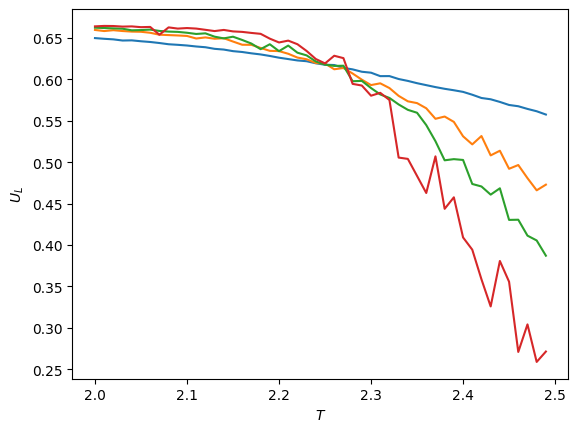

In [622]:
w = 1
tempRange = np.flip(np.arange(2,2.5,0.01))
plt.plot(tempRange, movingaverage(bc6Arr, w))
plt.plot(tempRange, movingaverage(bc12Arr, w))
plt.plot(tempRange, movingaverage(bc16Arr, w))
plt.plot(tempRange, movingaverage(bc24Arr, w))
plt.xlabel("$T$")
plt.ylabel("$U_L$")
# plt.xlim(2.22,2.30)
# plt.ylim(0.6,0.635)

FSS Binder cumulant: $U_L = \tilde{U}_L[(T-T_c)L^{1/\nu}]$, equation 12 in the paper

In [283]:
#Susceptibility function
def calcSus(lattice, temp):
    m2Arr = []


    magArr = calcMagArr(lattice, temp, 1000000) #already doing 10k iterations on the mag . . . and 10 on the BC call in plotting 1000000
    m2Arr = [np.power(x,2) for x in magArr]
    
    avgm = np.average(magArr)
    avgm2 = np.average(m2Arr)

    sus = (avgm2 - np.power(avgm,2))/(temp)
      

    return sus


if this fails at 1 million iterations, we can just smooth the actual sus curve out.  

In [284]:
for size in [32,24,16,12,6]:
    lattice = initLattice(size, True)

    tempRange = np.flip(np.arange(0.1,4,0.01))
    susArr = []
    for temp in tempRange:
        percent = round((tempRange[0]-temp)/tempRange[0] * 100,1)
        print("%s%%    L=%s" % (percent,size))
        sus = calcSus(lattice, temp)
        susArr.append(sus)

    name = "sus%sArrNEW.txt" % str(size)
    with open(name, 'w') as filehandle:
        json.dump(susArr, filehandle)

#plt.plot(tempRange, susArr)

0.0%    L=32
0.3%    L=32
0.5%    L=32
0.8%    L=32
1.0%    L=32
1.3%    L=32
1.5%    L=32
1.8%    L=32
2.0%    L=32
2.3%    L=32
2.5%    L=32
2.8%    L=32
3.0%    L=32
3.3%    L=32
3.5%    L=32
3.8%    L=32
4.0%    L=32
4.3%    L=32
4.5%    L=32
4.8%    L=32
5.0%    L=32
5.3%    L=32
5.5%    L=32
5.8%    L=32
6.0%    L=32
6.3%    L=32
6.5%    L=32
6.8%    L=32
7.0%    L=32
7.3%    L=32
7.5%    L=32
7.8%    L=32
8.0%    L=32
8.3%    L=32
8.5%    L=32
8.8%    L=32
9.0%    L=32
9.3%    L=32
9.5%    L=32
9.8%    L=32
10.0%    L=32
10.3%    L=32
10.5%    L=32
10.8%    L=32
11.0%    L=32
11.3%    L=32
11.5%    L=32
11.8%    L=32
12.0%    L=32
12.3%    L=32
12.5%    L=32
12.8%    L=32
13.0%    L=32
13.3%    L=32
13.5%    L=32
13.8%    L=32
14.0%    L=32
14.3%    L=32
14.5%    L=32
14.8%    L=32
15.0%    L=32
15.3%    L=32
15.5%    L=32
15.8%    L=32
16.0%    L=32
16.3%    L=32
16.5%    L=32
16.8%    L=32
17.0%    L=32
17.3%    L=32
17.5%    L=32
17.8%    L=32
18.0%    L=32
18.3%    L=32
18.5

In [117]:
# with open('susTempRange.txt', 'w') as filehandle:
#     json.dump(list(tempRange), filehandle)

In [547]:
tempRange = np.flip(np.arange(0.1,4,0.01))

In [651]:
from numpy import loadtxt
lines6 = loadtxt("sus6ArrNEW.txt", comments="#", delimiter=",", unpack=False)
lines12 = loadtxt("sus12ArrNEW.txt", comments="#", delimiter=",", unpack=False)
lines16 = loadtxt("sus16ArrNEW.txt", comments="#", delimiter=",", unpack=False)
lines24 = loadtxt("sus24ArrNEW.txt", comments="#", delimiter=",", unpack=False)
lines32 = loadtxt("sus32ArrNEW.txt", comments="#", delimiter=",", unpack=False)
sus6Arr = list(lines6)
sus12Arr = list(lines12)
sus16Arr = list(lines16)
sus24Arr = list(lines24)
sus32Arr = list(lines32)

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
/var/folders/tf/m_q5jhc978j5bnsvc9p4163h0000gn/T/ipykernel_84316/4127701187.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$\chi$")


Text(0, 0.5, '$\\chi$')

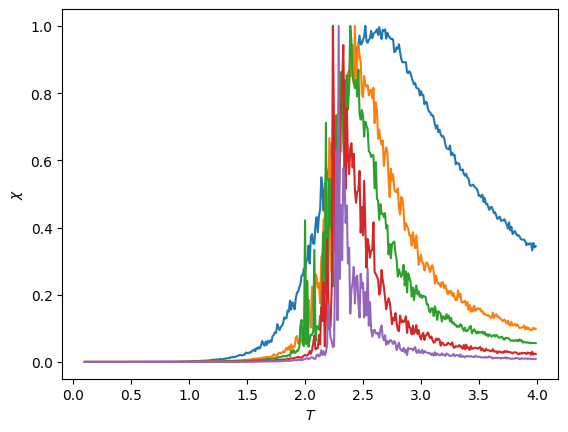

In [652]:
tempRange = np.flip(np.arange(0.1,4,0.01))
plt.plot(tempRange, [x/max(sus6Arr) for x in sus6Arr])
plt.plot(tempRange, [x/max(sus12Arr) for x in sus12Arr])
plt.plot(tempRange, [x/max(sus16Arr) for x in sus16Arr])
plt.plot(tempRange, [x/max(sus24Arr) for x in sus24Arr])
plt.plot(tempRange, [x/max(sus32Arr) for x in sus32Arr])
plt.xlabel("$T$")
plt.ylabel("$\chi$")

In [653]:
wSize = 10
avgsus6Arr = movingaverage(sus6Arr, wSize)
avgsus12Arr = movingaverage(sus12Arr, wSize)
avgsus16Arr = movingaverage(sus16Arr, wSize)
avgsus24Arr = movingaverage(sus24Arr, wSize)
avgsus32Arr = movingaverage(sus32Arr, wSize)

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/tf/m_q5jhc978j5bnsvc9p4163h0000gn/T/ipykernel_84316/3196941252.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$\chi$")


Text(0, 0.5, '$\\chi$')

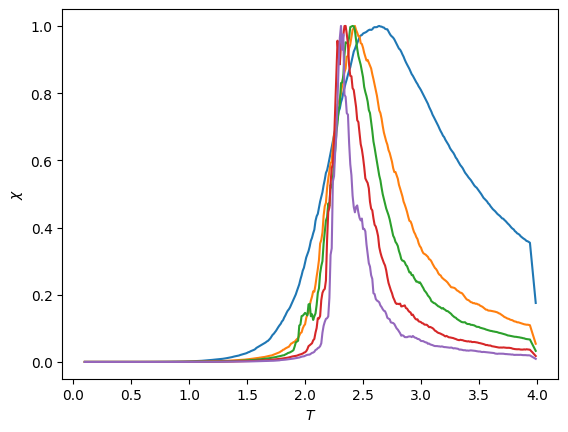

In [654]:
plt.plot(tempRange, [x/max(avgsus6Arr) for x in avgsus6Arr])
plt.plot(tempRange, [x/max(avgsus12Arr) for x in avgsus12Arr])
plt.plot(tempRange, [x/max(avgsus16Arr) for x in avgsus16Arr])
plt.plot(tempRange, [x/max(avgsus24Arr) for x in avgsus24Arr])
plt.plot(tempRange, [x/max(avgsus32Arr) for x in avgsus32Arr])
plt.xlabel("$T$")
plt.ylabel("$\chi$")

just some rough stuff to determine uncertainties based on FWHM assuming gaussian dist

In [655]:
from scipy.interpolate import UnivariateSpline
spline6 = UnivariateSpline(np.flip(tempRange), np.flip(avgsus6Arr)-np.max(avgsus6Arr)/2, s=0)
r1Six, r2Six = spline6.roots() # find the roots
sigmaSix = (r2Six-r1Six)/(2*np.sqrt(2*np.log(2)))
sigmaSix #sigma using guassian FWHM conversion!

spline12 = UnivariateSpline(np.flip(tempRange), np.flip(avgsus12Arr)-np.max(avgsus12Arr)/2, s=0)
r1Twelve, r2Twelve = spline12.roots() # find the roots
sigmaTwelve = (r2Twelve-r1Twelve)/(2*np.sqrt(2*np.log(2)))
sigmaTwelve #sigma using guassian FWHM conversion!

spline16 = UnivariateSpline(np.flip(tempRange), np.flip(avgsus16Arr)-np.max(avgsus16Arr)/2, s=0)
r1Sixteen, r2Sixteen = spline16.roots() # find the roots
sigmaSixteen = (r2Sixteen-r1Sixteen)/(2*np.sqrt(2*np.log(2)))
sigmaSixteen #sigma using guassian FWHM conversion!

spline24 = UnivariateSpline(np.flip(tempRange), np.flip(avgsus24Arr)-np.max(avgsus24Arr)/2, s=0)
r1TwentyFour, r2TwentyFour = spline24.roots() # find the roots
sigmaTwentyFour = (r2TwentyFour-r1TwentyFour)/(2*np.sqrt(2*np.log(2)))
sigmaTwentyFour #sigma using guassian FWHM conversion!

spline32 = UnivariateSpline(np.flip(tempRange), np.flip(avgsus32Arr)-np.max(avgsus32Arr)/2, s=0)
r1ThirtyTwo, r2ThirtyTwo = spline32.roots() # find the roots
sigmaThirtyTwo = (r2ThirtyTwo-r1ThirtyTwo)/(2*np.sqrt(2*np.log(2)))
sigmaThirtyTwo #sigma using guassian FWHM conversion!

error = [sigmaSix, sigmaTwelve, sigmaSixteen, sigmaTwentyFour, sigmaThirtyTwo]

2.2461753731343266

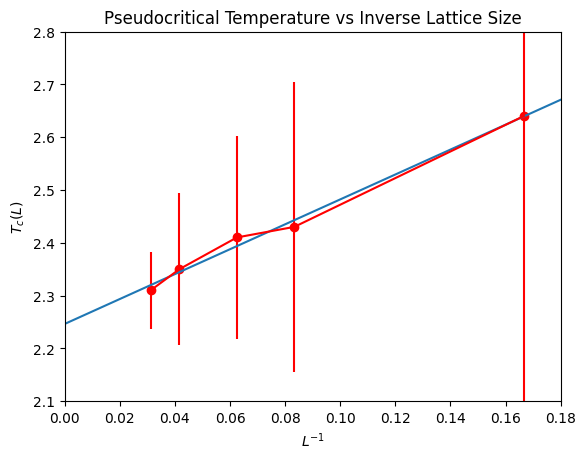

In [656]:
wSize = 10
avgsus6Arr = movingaverage(sus6Arr, wSize)
avgsus12Arr = movingaverage(sus12Arr, wSize)
avgsus16Arr = movingaverage(sus16Arr, wSize)
avgsus24Arr = movingaverage(sus24Arr, wSize)
avgsus32Arr = movingaverage(sus32Arr, wSize)

#ABOVE STUFF IS TEMP TO GET QUICK NUMBERS

maxSusArr =[]
maxSus6 = tempRange[np.where(avgsus6Arr == max(avgsus6Arr))][0]
maxSus12 = tempRange[np.where(avgsus12Arr == max(avgsus12Arr))][0]
maxSus16 = tempRange[np.where(avgsus16Arr == max(avgsus16Arr))][0]
maxSus24 = tempRange[np.where(avgsus24Arr == max(avgsus24Arr))][0]
maxSus32 = tempRange[np.where(avgsus32Arr == max(avgsus32Arr))][0]
maxSusArr.append(maxSus6)
maxSusArr.append(maxSus12)
maxSusArr.append(maxSus16)
maxSusArr.append(maxSus24)
maxSusArr.append(maxSus32)
maxSusArr

lArr = [1/6,1/12,1/16, 1/24, 1/32] #1/24, 1/32
xx = np.arange(0,1,0.001)
fit = np.polyfit(lArr, maxSusArr, 1)
yy = [fit[0]*x + fit[1] for x in xx]


#plt.plot(lArr,maxSusArr,color="blue")
plt.errorbar(lArr, maxSusArr, yerr=error, color="red")
plt.scatter(lArr,maxSusArr,color="red")
plt.plot(xx,yy)
plt.xlabel("$L^{-1}$")
plt.ylabel("$T_c(L)$")
plt.title("Pseudocritical Temperature vs Inverse Lattice Size")
plt.xlim(0,0.18)
plt.ylim(2.1,2.8)
fit[1]

New: 2.2461753731343266 \
Old: 2.239682835820894

In [308]:
count = 0
avgWindow = []
for sus in sus32Arr:
    if(count % 10 == 0):
        np.average(avgWindow)
        avgWindow = []
    avgWindow.append(sus)
    
    

[371.90104113337367,
 371.35206495521595,
 459.90583470150693,
 500.41456523983027,
 480.743217737951,
 383.9176489453364,
 372.96634494493367,
 488.6041890115041,
 435.72783221107545,
 494.71063114251535,
 427.98026633758764,
 429.05160594375826,
 395.0239836808749,
 494.2279926311161,
 456.8726006818418,
 530.3029520396615,
 443.4355083451949,
 442.3252013596862,
 477.31940608283264,
 460.3519480420675,
 437.0137175529888,
 514.6726243967915,
 464.9281458316572,
 458.5570069737429,
 468.78164250210597,
 572.0387803093654,
 507.07221497106957,
 556.5700584200829,
 589.9355368477347,
 488.16615668107505,
 445.6923163373384,
 567.7068932799103,
 451.3075086586709,
 566.429651314284,
 571.1065018473347,
 546.1256779265772,
 607.8823770321466,
 654.345879694281,
 617.7737386163315,
 553.9785289869443,
 614.8431158768259,
 655.7160117762281,
 619.4722782563741,
 638.7698865882697,
 584.3911174860698,
 536.3724818210783,
 590.7911030555326,
 664.4197496885354,
 720.1837769047413,
 679.95854

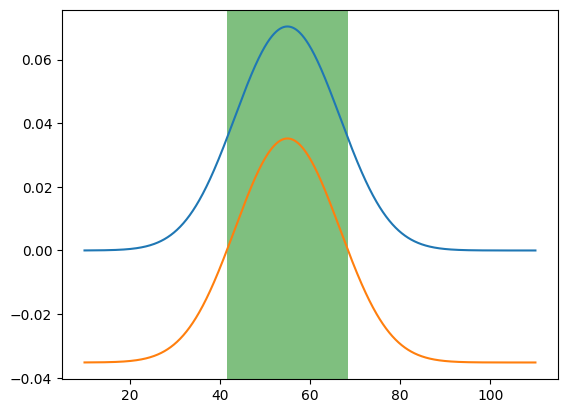

In [40]:
import numpy as np
from scipy.interpolate import UnivariateSpline

def make_norm_dist(x, mean, sd):
    return 1.0/(sd*np.sqrt(2*np.pi))*np.exp(-(x - mean)**2/(2*sd**2))

x = np.linspace(10, 110, 1000)
green = make_norm_dist(x, 50, 10)
pink = make_norm_dist(x, 60, 10)

blue = green + pink   

# create a spline of x and blue-np.max(blue)/2 
spline = UnivariateSpline(x, blue-np.max(blue)/2, s=0)
r1, r2 = spline.roots() # find the roots

import pylab as pl
pl.plot(x, blue)
pl.plot(x,spline(x))
pl.axvspan(r1, r2, facecolor='g', alpha=0.5)
pl.show()

[ 6.84834567  3.65180535  0.32026336 16.16643878  0.29622172]


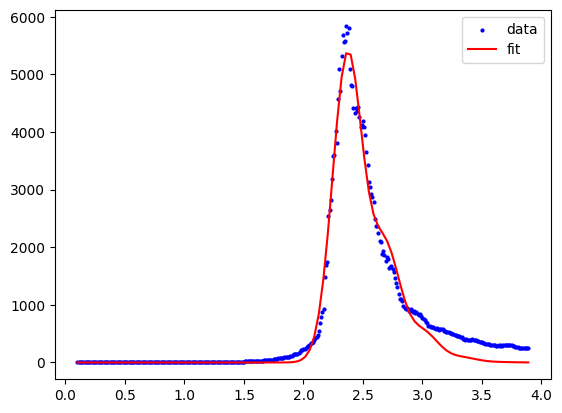

In [240]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def func(x, A, e0, hf, S, fwhm):
    return sum((A * ((e0-i*hf)/e0)**3 * ((S**i)/math.factorial(i)) * np.exp(-4*np.log(2)*((x-e0+i*hf)/fwhm)**2)) for i in range(n))

p = [1,1,1,1,1]
d = 10 #domain cutoff
x = tempRange[d:]
y = avgsus24Arr[d:]
n = 5
fittedParameters, pcov = curve_fit(func, x, y, p0=p)
#A,e0,hf,S,fwhm = fittedParameters

print(fittedParameters)
plt.scatter(x, y, s=4, color="blue", label="data")
x_fit = np.linspace(min(x), max(x), 100)
y_fit = func(x_fit, *fittedParameters)
plt.plot(x_fit, y_fit, label="fit", color="red")
plt.legend()
plt.show()

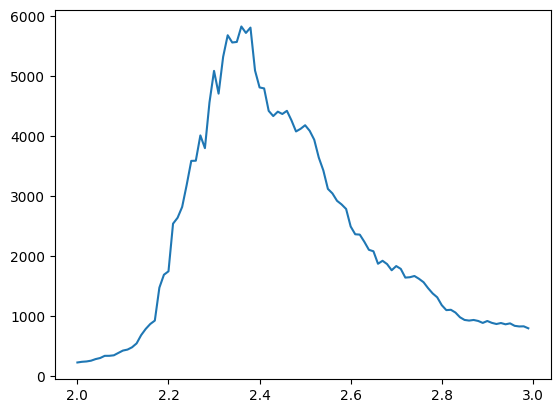

In [243]:
dL = 100 # 10
dR = 200
# dL = 0
# dR = 400
plt.plot(tempRange[dL:dR], avgsus24Arr[dL:dR])
# plt.plot(tempRange, spline(tempRange))
# plt.plot(tempRange, avgsus6Arr)

TODO: Make a sum of gaussians to generate better uncertainties